# Library to represent 3D rotations


Implementation of 3 representation of spatial rotations:

- Axis-angle
- Quaternion 
- Matrix

## Axis-angle:
Assume $\mathbf{n} = (n_x, n_y, n_z)$ is a unit vector. To rotate a vector $\mathbf{r}\in R^{3}$ around $\mathbf{n}$ by an angle $\alpha$:

$$
\mathbf{r}' = (\cos \alpha) \mathbf{r} + (\sin \alpha) \mathbf{n} \times \mathbf{r} + (1 - \cos \alpha)(\mathbf{n}\mathbf{r})\mathbf{n}
$$

## Quaternions:
$\mathbf{q}$ is a quaternion, $\mathbf{q} \in \mathbf{H}$ and has a scalar and vector components, or equivalently, $w$, $x$, $y$ and $z$ components:
$$
 \mathbf{q} = [w; \mathbf{v}] = [w, x, y, z],
$$

$w, x, y, z\in R$ and $\mathbf{v}\in R^3$.

$\mathbf{q}$ can represent a rotation if it is a unit-quaternion, if $||\mathbf{q}|| = \sqrt{w^2 + x^2 + y^2 + z^2} =1 $.

In this case, the components describe a rotation of angle $\alpha$, around the axis $\mathbf{n} = (n_1, n_2, n_3$): $\mathbf{q} = [\cos \frac{\alpha}{2} ; \sin \frac{\alpha}{2} \frac{\mathbf{n}}{||\mathbf{n}||}]$

Rotating the vector $\mathbf{r}$  by unit quaternion $\mathbf{q}$ is given by

$$
[0,\mathbf{r}'] = \mathbf{q} [0, \mathbf{r}] \mathbf{q}^{-1},
$$

where $[0, \mathbf{r}]$ is the quternion that has 0 scalar part, and $\mathbf{r}$ vector part.

A composite rotation is simply a rotation by the quaternion-product.


## Matrix representation:

$\mathbf{M} \in R^{3\times 3}$,

$\mathbf{M}: R \to R$ linear function. 

If det $\mathbf{M} = 1$, the matrix describes a pure rotation (without reflection). $\mathbf{r}' = \mathbf{M}\mathbf{r}$




## Conversion between representations: 

- Axis - angle <-> Matrix : https://en.wikipedia.org/wiki/Rotation_matrix#Axis_and_angle
- Quaternion -> Axis-angle: $[\cos \frac{\alpha}{2} ; \sin \frac{\alpha}{2} \frac{\mathbf{n}}{||\mathbf{n}||}]$
- Quaternion -> Axis-angle: $\alpha = 2 \text{atan2}(|v|, w)$, $\mathbf{n} = \frac{\mathbf{v}}{\sin (\alpha/2)}$
- Matrix <-> Quaternion: https://en.wikipedia.org/wiki/Rotation_matrix#Quaternion
- Matrix -> Axis-angle: https://en.wikipedia.org/wiki/Rotation_matrix#Conversion_from_and_to_axis–angle


# Implementation

3 basic, templated classes: 
```c++
axisAngle
quaternion
Matrix3
```

If the conversion is reasonable (the structures represent rotation), conversion between them is:

```c++
convertToAxisAngle()
convertToQuaternion()
convertToMatrix()
```

Rotation of a ```std::vector``` is contained in an ```std::optional```
### Matrix:
```c++
std::vector<double> r {x, y, z};
Matrix3<double> m {a11, a12, a13, a21, a22, a23, a31, a32, a33};
std::optional<std::vector<double>> rPrime = m*r;
if(rPrime){
    rPrime.value();
}
```

### Quaternion:
```c++
std::vector<double> r {x, y, z};
Matrix3<double> quaternion {wq, xq, yq, zq};
std::optional<std::vector<double>> rPrime = rotateByQuaternion(q, r);
if(rPrime){
    rPrime.value();
}
```

quaternions and matrices can be multiplied to give composite rotations 

# Test cases:

Rotation of $\mathbf{r} = (0 1 0)$ around the $x$ axis by angle $\alpha = 30^0$.

$$
   \textbf{M}=
  \left[ {\begin{array}{ccc}
   1 & 0 & 0 \\
   0 & \cos \alpha & \sin \alpha  \\
   0 & -\sin \alpha & \cos \alpha
  \end{array} } \right] =  \left[ {\begin{array}{ccc}
    1&  0 &  0\\
    0&  0.1542515&  0.9880316\\
    0& -0.9880316&  0.1542515
  \end{array} } \right]
$$

$$
\textbf{M}\textbf{r} = (0, \cos \alpha, \sin \alpha) = (0, 0.1542515, 0.9880316) = \textbf{r}'
$$

Same with a quaternion: 
$$
\mathbf{q} = [\cos 15^0, \sin 15^0, 0, 0] = [-0.7596879, 0.6502878, 0., 0.]  \\
[0,\mathbf{r}'] = \mathbf{q}[0, \mathbf{r}] \mathbf{q}^{-1} = [0, 0, 0.1542515, 0.9880316] 
$$

# Example 

Rotation of an ellipse, in ```main.cpp```. Rotation around the axis $x=y$, by $45^o$, using quaternions. 


Text(0.08721147209692777, 0.011684121759550503, '$Z$')

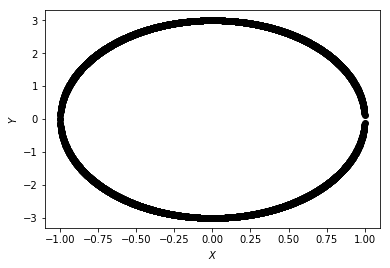

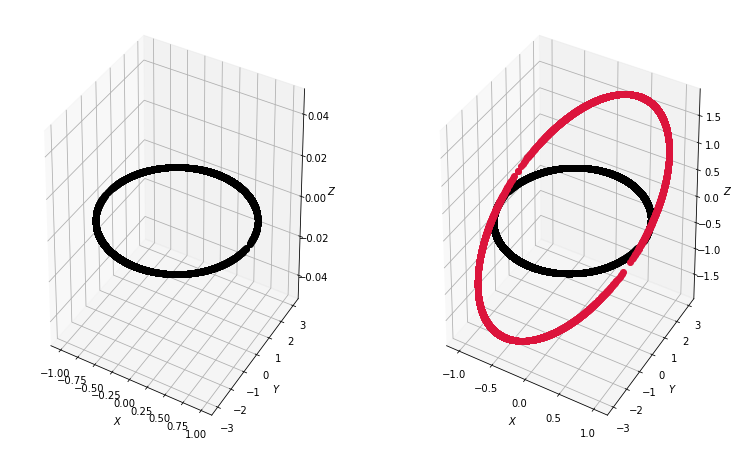

In [45]:
import numpy as np
import matplotlib.pyplot as plt
def ellipse(x, a, b):
    return (b/a)*np.sqrt(a**2 - x**2)

def ellipse2(x, a, b):
    return -(b/a)*np.sqrt(a**2 - x**2)
plt.plot(np.arange(-1, 1, 0.001), ellipse(np.arange(-1, 1, 0.001), 1., 3.), 'o', c='black')

plt.plot(np.arange(-1, 1, 0.001), ellipse2(np.arange(-1, 1, 0.001), 1., 3.), 'o', c='black')
plt.xlabel('$X$')
plt.ylabel('$Y$')

numPoints = np.arange(-1, 1, 0.001).shape[0]
ellipsePoints = np.zeros((2*numPoints, 3))
ellipsePoints[:numPoints, 0] = np.arange(-1, 1, 0.001)
ellipsePoints[numPoints:, 0] = np.arange(-1, 1, 0.001)
ellipsePoints[:numPoints, 1] = ellipse(np.arange(-1, 1, 0.001), 1., 3.)
ellipsePoints[numPoints:, 1] = ellipse2(np.arange(-1, 1, 0.001), 1., 3.)
np.savetxt( "ellipse.dat", ellipsePoints)



from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax.plot(ellipsePoints[:,0], ellipsePoints[:,1], ellipsePoints[:,2], 'o', c='Black')
rot = np.loadtxt('quat_ellipse.dat')
ax2.plot(ellipsePoints[:,0], ellipsePoints[:,1], ellipsePoints[:,2], 'o', c='Black')
ax2.plot(rot[:,0], rot[:,1], rot[:,2], 'o', c= 'Crimson')
plt.savefig('rotated_ellipse.png')
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')
ax2.set_xlabel('$X$')
ax2.set_ylabel('$Y$')
ax2.set_zlabel('$Z$')

In [46]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')